# CSE474/574 - Programming Assignment 2

In [84]:
#!pip install tensorflow==1.14

## Part 1 - Sentiment Analysis

In the code provided below, you need to add code wherever specified by `TODO:`. 

> You will be using a Python collection class - `Counter` to maintain the word counts. 

> See https://docs.python.org/2/library/collections.html for more details.

## Task 1: Implement a simple hand-crafted classifier that can label a movie review as positive or negative.

In [85]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [86]:
# read data files 
g = open('reviews.txt','r') # What we know!
reviews_all = list(map(lambda x:x[:-1],g.readlines()))
g.close()
g = open('labels.txt','r') # What we WANT to know!
sentiments_all = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

# load vocabulary
g = open('vocab.txt','r')
vocab = [s.strip() for s in g.readlines()]

The data is a set of 25000 movie reviews, along with a `POSITIVE` or `NEGATIVE` sentiment label assigned to the review.

In [87]:
# Check out sample reviews
print('A {} review:'.format(sentiments_all[0]))
print(reviews_all[0])
print('\nA {} review:'.format(sentiments_all[1]))
print(reviews_all[1])

A POSITIVE review:
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

A NEGATIVE review:
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comed

In [88]:
# split into training and test data
reviews_train,reviews_test = reviews_all[0:24000],reviews_all[24000:]
sentiments_train,sentiments_test = sentiments_all[0:24000],sentiments_all[24000:]

In [89]:
# maintain Counter objects to store positive, negative and total counts for
# all the words present in the positive, negative and total reviews.
positive_word_count = Counter()
negative_word_count = Counter()
total_counts = Counter()
for i, words in enumerate(reviews_train):
    if sentiments_train[i] == 'POSITIVE':
        
        for word in words.split():
            positive_word_count[word] += 1
            total_counts[word] += 1
    else:
        for word in words.split():
            negative_word_count[word] += 1
            total_counts[word]+=1
# TODO: Loop over all the words in the vocabulary
# and increment the counts in the appropriate counter objects
# based on the training data

In [90]:
# maintain a Counter object to store positive to negative ratios 
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        # TODO: Code for calculating the ratios (remove the next line)
        pos_neg_ratios[term] += positive_word_count[term] / max(1,negative_word_count[term])

In [91]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0618582280413789
Pos-to-neg ratio for 'amazing' = 4.031496062992126
Pos-to-neg ratio for 'terrible' = 0.17256637168141592


In [92]:
# take a log of the ratio
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)
    print(word, ratio)

    

edie 109.0
felix 39.0
victoria 21.9
polanski 19.8
matthau 18.625
mildred 15.428571428571429
gandhi 14.25
flawless 12.444444444444445
superbly 10.181818181818182
perfection 9.615384615384615
astaire 9.153846153846153
lemmon 8.636363636363637
captures 8.26086956521739
voight 8.25
wonderfully 8.028571428571428
brosnan 7.533333333333333
powell 7.52
bakshi 7.125
ritter 7.0
lincoln 6.954545454545454
delightful 6.628571428571429
bourne 6.6
andrews 6.5
refreshing 6.481481481481482
flynn 6.35
homer 6.285714285714286
gripping 6.25
breathtaking 6.136363636363637
sadness 6.066666666666666
palma 6.0
elvira 5.954545454545454
underrated 5.90625
lily 5.875
extraordinary 5.833333333333333
beautifully 5.806451612903226
superb 5.612244897959184
delight 5.565217391304348
favorites 5.444444444444445
timeless 5.444444444444445
welles 5.384615384615385
macy 5.375
unforgettable 5.318181818181818
hartley 5.3125
sinatra 5.282051282051282
friendship 5.209302325581396
jackie 5.162162162162162
sullivan 5.161290322

anna 1.8409090909090908
generation 1.8395061728395061
river 1.836734693877551
claire 1.8360655737704918
david 1.8333333333333333
drew 1.8333333333333333
dennis 1.8333333333333333
expressions 1.8333333333333333
russell 1.8309859154929577
brooks 1.830188679245283
personalities 1.830188679245283
charismatic 1.8297872340425532
hall 1.8289473684210527
artist 1.826086956521739
psychological 1.826086956521739
kubrick 1.826086956521739
pre 1.8240740740740742
experiences 1.8235294117647058
animation 1.8224637681159421
symbolism 1.8205128205128205
pleasure 1.819047619047619
union 1.8181818181818181
war 1.8176638176638176
lives 1.8176100628930818
always 1.8170403587443946
visually 1.8160919540229885
oliver 1.8157894736842106
charm 1.8129496402877698
french 1.8111111111111111
cameron 1.8095238095238095
job 1.80719794344473
possibility 1.8055555555555556
surprises 1.8028169014084507
realism 1.8020833333333333
images 1.8
fox 1.8
wwii 1.8
gift 1.8
vincent 1.7959183673469388
hugh 1.794871794871795
fai

comedies 1.5207100591715976
rarely 1.5206611570247934
jerry 1.5202702702702702
twisted 1.5194805194805194
destruction 1.5185185185185186
lucky 1.5151515151515151
becoming 1.5149253731343284
discover 1.5148514851485149
regular 1.5148514851485149
particular 1.5141843971631206
documentary 1.5125348189415042
parents 1.512280701754386
communist 1.5121951219512195
detailed 1.5116279069767442
areas 1.511111111111111
directorial 1.5106382978723405
grows 1.5098039215686274
experience 1.5097560975609756
details 1.509433962264151
spots 1.509090909090909
pride 1.5084745762711864
comedic 1.5081967213114753
protect 1.5076923076923077
skill 1.5072463768115942
well 1.5063445583211323
key 1.5060975609756098
fairy 1.5060240963855422
believes 1.5057471264367817
evening 1.5052631578947369
gordon 1.5052631578947369
mine 1.5046728971962617
peter 1.5033783783783783
starring 1.5027027027027027
cinema 1.5025906735751295
score 1.5
surprised 1.5
minor 1.5
collection 1.5
price 1.5
harsh 1.5
irish 1.5
rachel 1.5
e

rochester 1.3484848484848484
art 1.3483992467043315
remember 1.3477633477633477
bit 1.347546259050684
admire 1.346938775510204
drunken 1.346938775510204
views 1.3466666666666667
town 1.3462282398452612
top 1.3460526315789474
private 1.3454545454545455
surrounding 1.3454545454545455
featuring 1.345132743362832
perform 1.3442622950819672
stops 1.34375
portrayed 1.3412698412698412
music 1.3404423380726698
range 1.3404255319148937
heat 1.3396226415094339
viewers 1.3394495412844036
judge 1.3392857142857142
tongue 1.3387096774193548
somewhat 1.3383458646616542
wins 1.338235294117647
praise 1.3380281690140845
trip 1.3366834170854272
eye 1.3362068965517242
boys 1.3360323886639676
adults 1.3355704697986577
together 1.334056399132321
wit 1.3333333333333333
code 1.3333333333333333
spoil 1.3333333333333333
afternoon 1.3333333333333333
library 1.3333333333333333
superhero 1.3333333333333333
tone 1.3317307692307692
style 1.331297709923664
her 1.331139773624638
features 1.3295454545454546
joe 1.32871

death 1.097254004576659
jesse 1.096774193548387
walls 1.096774193548387
falling 1.0965909090909092
incident 1.0961538461538463
see 1.0959059893858984
anderson 1.0957446808510638
specific 1.0952380952380953
keep 1.0949796472184532
eyes 1.0944741532976827
dad 1.09375
faces 1.09375
neighborhood 1.09375
film 1.0935146556861894
lot 1.0934065934065933
belongs 1.0923076923076922
adding 1.0921052631578947
wish 1.0909090909090908
nick 1.0909090909090908
network 1.0909090909090908
fallen 1.0909090909090908
big 1.0905683947532792
wants 1.0901360544217686
majority 1.09009009009009
suffered 1.0895522388059702
r 1.0894736842105264
three 1.0894538606403013
logical 1.0892857142857142
robot 1.0891089108910892
which 1.0886877828054298
government 1.0885416666666667
canadian 1.088235294117647
infamous 1.088235294117647
performers 1.088235294117647
design 1.0880503144654088
stars 1.0878980891719745
pop 1.087837837837838
villains 1.0866141732283465
extras 1.0865384615384615
woman 1.0850897736143639
g 1.085


motion 0.9638009049773756
self 0.9637305699481865
eve 0.9636363636363636
argue 0.9636363636363636
headed 0.9634146341463414
bar 0.9631578947368421
ghost 0.9631147540983607
break 0.9630872483221476
long 0.963049853372434
amongst 0.9629629629629629
pulp 0.9629629629629629
mini 0.9622641509433962
cliff 0.9622641509433962
naturally 0.9618320610687023
replaced 0.9615384615384616
user 0.9615384615384616
notion 0.9615384615384616
lots 0.961340206185567
notice 0.9611111111111111
drives 0.961038961038961
comments 0.9606299212598425
fbi 0.9605263157894737
double 0.9603960396039604
figure 0.96
enemy 0.9595959595959596
according 0.9583333333333334
but 0.9582815041622811
split 0.9577464788732394
level 0.9577167019027484
rather 0.9573353293413174
appearing 0.9571428571428572
pulled 0.9565217391304348
giving 0.9564164648910412
rushed 0.9558823529411765
itself 0.9558441558441558
teens 0.9555555555555556
check 0.9553805774278216
duke 0.9552238805970149
kicks 0.9552238805970149
bigger 0.9545454545454546

guts 0.7468354430379747
making 0.7464960390006093
box 0.7464387464387464
unable 0.7463768115942029
cared 0.746268656716418
piece 0.7461809635722679
whole 0.7458823529411764
directing 0.7458100558659218
mistakes 0.7454545454545455
watching 0.7445630684064848
clips 0.7444444444444445
attacks 0.7444444444444445
sort 0.7440699126092385
weapon 0.7439024390243902
holiday 0.7439024390243902
burton 0.7435897435897436
there 0.742964533538936
nude 0.7428571428571429
required 0.7428571428571429
jump 0.7425149700598802
believe 0.7421931735657226
leg 0.7419354838709677
superficial 0.7419354838709677
bodies 0.7413793103448276
murdered 0.7412587412587412
ship 0.7411167512690355
stuff 0.7406832298136646
angry 0.7391304347826086
properly 0.7391304347826086
ho 0.7391304347826086
beyond 0.738045738045738
confused 0.7378640776699029
tame 0.7377049180327869
average 0.7372448979591837
stop 0.7371048252911814
count 0.7360406091370558
myself 0.7359375
doesn 0.7358639778568604
running 0.7352415026833632
ruin 0

editor 0.5352112676056338
screenwriter 0.5346534653465347
channel 0.5345454545454545
frankly 0.5341614906832298
remake 0.5340599455040872
why 0.533672553127806
forest 0.532258064516129
neither 0.5321637426900585
flick 0.5317258883248731
mistake 0.5315985130111525
exercise 0.5308641975308642
sadistic 0.5294117647058824
wouldn 0.5290519877675841
lacking 0.5287356321839081
virus 0.5280898876404494
bush 0.5280898876404494
originality 0.5277777777777778
makeup 0.5271317829457365
proof 0.5263157894736842
bucks 0.525
hour 0.52443857331572
holes 0.5236051502145923
saying 0.5226130653266332
damage 0.5223880597014925
handed 0.5213675213675214
creature 0.5213270142180095
cameras 0.5211267605633803
arm 0.5208333333333334
utterly 0.5205479452054794
hills 0.52
raped 0.52
cover 0.5191740412979351
bible 0.5189873417721519
please 0.5187406296851574
blair 0.5181818181818182
truck 0.5178571428571429
spent 0.5175438596491229
gross 0.5175438596491229
pg 0.5164835164835165
lack 0.5156482861400894
stock 0.51

crappy 0.203125
vampires 0.2
stupid 0.195906432748538
pile 0.19298245614035087
junk 0.18831168831168832
dire 0.18
badly 0.17495395948434622
mess 0.1743295019157088
garbage 0.1742627345844504
worse 0.17261410788381742
terrible 0.17256637168141592
embarrassing 0.17204301075268819
dreadful 0.17
crap 0.16568742655699178
suck 0.16216216216216217
tedious 0.16201117318435754
insulting 0.16037735849056603
wasted 0.1581196581196581
amateurish 0.15384615384615385
cardboard 0.15178571428571427
stupidity 0.15151515151515152
unconvincing 0.1513157894736842
uninteresting 0.1497005988023952
appalling 0.14953271028037382
idiotic 0.1487603305785124
pathetic 0.14646464646464646
horrible 0.14624505928853754
unintentional 0.14606741573033707
gadget 0.14583333333333334
godzilla 0.14444444444444443
lame 0.1382636655948553
sucks 0.13807531380753138
insult 0.13559322033898305
uninspired 0.13333333333333333
miserably 0.13333333333333333
boredom 0.1322314049586777
existent 0.13043478260869565
wasting 0.11811023

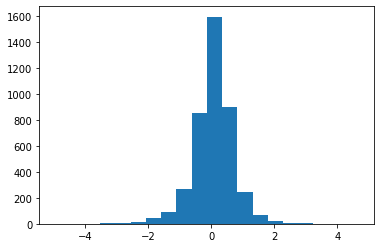

In [93]:
# visualize the distribution of the log-ratio scores
scores = np.array(list(pos_neg_ratios.values()))
vocab_selected = list(pos_neg_ratios.keys())

h = plt.hist(scores,bins=20)

The above histogram should give you an idea about the distribution of the scores.

Notice how the scores are distributed around 0. A word with score 0 can be considered as `neutral`. 

In [94]:
# Print few words with neutral score
for ind in np.where(scores == 0)[0][0:10]:
    print(vocab_selected[ind])

realize
hands
extreme
beat
onto
psycho
test
obsessed
choose
speech


**APPROACH 1** Implement a simple non-machine learning that only uses the log-ratios to determine if a review is positive or negative. This function will be applied to the test data to calculate the accuracy of the model. 

_See the assignment document for hints._

In [95]:
def nonml_classifier(review,pos_neg_ratios):
    '''
    Function that determines the sentiment for a given review.
    
    Inputs:
      review - A text containing a movie review
      pos_neg_ratios - A Counter object containing frequent words
                       and corresponding log positive-negative ratio
    Return:
      sentiment - 'NEGATIVE' or 'POSITIVE'
    '''
    # TODO: Implement the algorithm here. Change the next line.
    counter = 0
    for word in review.split():
        count = int(round(pos_neg_ratios[word]))
        counter += count
    if(counter < 0):
        return 'NEGATIVE'
    else:
        return 'POSITIVE'

In [96]:
predictions_test = []
for r in reviews_test:
    l = nonml_classifier(r,pos_neg_ratios)
    predictions_test.append(l)

# calculate accuracy
correct = 0
for l,p in zip(sentiments_test,predictions_test):
    if l == p:
        correct = correct + 1
print('Accuracy of the model = {}'.format(correct/len(sentiments_test)))

Accuracy of the model = 0.794


**Approach 2** Implement a neural network for sentiment classification. 

> ### System Configuration
This part requires you to use a computer with `tensorflow` library installed. More information is available here - https://www.tensorflow.org.
`
You are allowed to implement the project on your personal computers using `Python 3.4 or above. You will need `numpy` and `scipy` libraries. If you need to use departmental resources, you can use **metallica.cse.buffalo.edu**, which has `Python 3.4.3` and the required libraries installed. 

> Students attempting to use the `tensorflow` library have two options: 
1. Install `tensorflow` on personal machines. Detailed installation information is here - https://www.tensorflow.org/. Note that, since `tensorflow` is a relatively new library, you might encounter installation issues depending on your OS and other library versions. We will not be providing any detailed support regarding `tensorflow` installation. If issues persist, we recommend using option 2. 
2. Use **metallica.cse.buffalo.edu**. If you are registered into the class, you should have an account on that server. The server already has Python 3.4.3 and TensorFlow 0.12.1 installed. Please use /util/bin/python for Python 3. 
3. To maintain a ssh connection for a long-running task on a remote machine, use tools like `screen`. For more information: https://linuxize.com/post/how-to-use-linux-screen/ 
4. For running jupyter-notebook over a remote machine find information on: https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/
 


In [97]:
def create_input_vector(review,word2index):
    '''
    Function to count how many times each word is used in the given review,
    # and then store those counts at the appropriate indices inside x.
    '''
    vocab_size = len(word2index)
    x = np.zeros((1, vocab_size))
    for w in review.split(' '):
        if w in word2index.keys():
            x[0][word2index[w]] += 1
    return x

In [98]:
def find_ignore_words(pos_neg_ratios):
    '''
    Function to identify words to ignore from the vocabulary
    '''
    ignore_words = []
    for ratio in pos_neg_ratios.items():
      if(int(round(ratio[1])) == 0):
        ignore_words.append(ratio[0])
    return ignore_words

In [99]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = [] #find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

#### Generate .hdf5 files from the processed data
Given that the data is moderately large sized, the `hdf5` file format provides a more efficient file representation for further processing. See [here](https://anaconda.org/anaconda/hdf5) for more details and installation instructions.

In [114]:
import h5py

In [115]:
# Run the script once to generate the file 
# delete the exiting 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data1.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

OSError: Unable to create file (unable to truncate a file which is already open)

In [116]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

In [117]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [118]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 10
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [119]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer

In [120]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [121]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [122]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.944458, Test_acc: 1.000000
Train acc: 0.997375, Test_acc: 1.000000
Train acc: 0.997458, Test_acc: 1.000000
Train acc: 0.997458, Test_acc: 1.000000
Train acc: 0.997417, Test_acc: 1.000000
Train acc: 0.997500, Test_acc: 1.000000
Train acc: 0.997417, Test_acc: 1.000000
Train acc: 0.997625, Test_acc: 1.000000
Train acc: 0.997625, Test_acc: 1.000000
Train acc: 0.997542, Test_acc: 1.000000
Train acc: 0.997625, Test_acc: 1.000000
Train acc: 0.997667, Test_acc: 1.000000
Train acc: 0.997625, Test_acc: 1.000000
Train acc: 0.997667, Test_acc: 1.000000
Train acc: 0.997667, Test_acc: 1.000000
Train acc: 0.997542, Test_acc: 1.000000
Train acc: 0.997500, Test_acc: 1.000000
Train acc: 0.997667, Test_acc: 1.000000
Train acc: 0.997708, Test_acc: 1.000000
Train acc: 0.997750, Test_acc: 1.000000
Train acc: 0.997708, Test_acc: 1.000000
Train acc: 0.997750, Test_acc: 1.000000
Train acc: 0.997708, Test_acc: 1.000000
Train acc: 0.997792, Test_acc: 1.000000
Train acc: 0.997833, Test_acc: 1.000000


In [123]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

In [0]:
import h5py

In [0]:
# Run the script once to generate the file 
# delete the exiting 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data2.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

In [0]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

In [0]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 20  # 1st layer number of neurons
n_hidden_2 = 20
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
	'out1': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1']) + biases['out2'])
    return out_layer

In [0]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [0]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data2.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))